# Resolução do Case 
### Processo Seletivo Trybe: Vaga Lead Data Analyst

###### Plano para resolução
1 - Importação de cada base de dados e avaliação da qualidade dos dados em cada uma.

2 - Definição do perfil de estudantes por:
    2.1 - Simples, por:
        2.1.1 - idades: distribuição por intervalos de idades, demonstração por histograma (em valores absolutos)
        2.1.2 - gêneros: distribuição por gêneros, demonstração por barras contíguas (em porcentagens)
        2.1.3 - educação: distribuição por menor-maior educação obtida, por histograma (em porcentagens)
        2.1.4 - deficiência: distribuição por sinalização de deficiência, em número/texto
        2.1.5 - pobreza: distribuição por faixa IMD, por histograma (em porcentagens)
        2.1.6 - regiões: distribuição por regiões, demonstração por mapa (em porcentagens)
        
3 - Avaliação de variáveis alvo (VA) e previsoras (VP), *básica*.
    3.1 - VA: Desempenho - "score" no _df_ de _assessments_
        3.1.1 - VP1: idades
        3.1.2 - VP2: gêneros
        3.1.3 - VP3: educação
        3.1.4 - VP4: deficiência
        3.1.5 - VP5: pobreza
        3.1.5 - VP6: regiões

In [1]:
#Importando as bibliotecas necessárias para o desenvolvimento do carregamento, limpeza e análise exploratória dos dados.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats 

##### Importando e avaliando a importação de cada arquivo

In [2]:
#Importações das bases de dados
stdinfo_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\studentInfo.csv')
stdassessment_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\studentAssessment.csv')
assessments_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\assessments.csv')
courses_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\courses.csv')
stdregistration_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\studentRegistration.csv')
stdvle_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\studentVle.csv')
vle_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\vle.csv')

In [3]:
#Análises iniciais da composição de cada arquivo
stdinfo_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [4]:
stdinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [5]:
stdassessment_df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [6]:
stdassessment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [7]:
#limpeza dos dados da coluna "imd_band" no dataframe de informações de estudantes (stdinfo_df)
stdinfo_df[pd.isnull(stdinfo_df["imd_band"])].shape
moda_imd=stats.mode(stdinfo_df["imd_band"].values)[0][0]

for ind in range(0,stdinfo_df.shape[0]):
    
    if pd.isnull(stdinfo_df.iloc[[ind]]["imd_band"].values[0]):
        stdinfo_df.at[ind,"imd_band"]=moda_imd
        
stdinfo_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [8]:
assessments_df.head(6)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0


In [9]:
assessments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [10]:
#Limpeza dos dados da planilha de assessments

for i in range(0, assessments_df.shape[0]):
        compare_value = assessments_df.iloc[[i]]['date'].values[0]
        if pd.isnull(compare_value):
            code_module = assessments_df.iloc[[i]]['code_module'].values[0]
            code_presentation = assessments_df.iloc[[i]]['code_presentation'].values[0]
            module_presentation_length=courses_df[(courses_df['code_module']==code_module)&(courses_df['code_presentation']==code_presentation)]['module_presentation_length'].values[0]
            assessments_df.at[i, 'date'] = module_presentation_length
                                                        
assessments_df.head(6)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,268.0,100.0


In [11]:
courses_df.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [12]:
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [13]:
stdregistration_df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [14]:
stdregistration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [15]:
stdvle_df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [16]:
stdvle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [17]:
vle_df.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [18]:
vle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [19]:
stdinfoEstdassessment_df = pd.merge(stdinfo_df, stdassessment_df, how='left', on =['id_student'])
stdinfoEstdassessment_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752.0,18.0,0.0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753.0,53.0,0.0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754.0,115.0,0.0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1755.0,164.0,0.0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1756.0,212.0,0.0,82.0


In [20]:
stdinfo_df.groupby('region')['id_student'].count()

region
East Anglian Region     3340
East Midlands Region    2365
Ireland                 1184
London Region           3216
North Region            1823
North Western Region    2906
Scotland                3446
South East Region       2111
South Region            3092
South West Region       2436
Wales                   2086
West Midlands Region    2582
Yorkshire Region        2006
Name: id_student, dtype: int64

In [21]:
stdinfo_df.groupby('gender')['id_student'].count()

gender
F    14718
M    17875
Name: id_student, dtype: int64

In [22]:
stdinfo_df.groupby('age_band')['id_student'].count()

age_band
0-35     22944
35-55     9433
55<=       216
Name: id_student, dtype: int64

In [23]:
stdinfo_df.groupby('highest_education')['id_student'].count()

highest_education
A Level or Equivalent          14045
HE Qualification                4730
Lower Than A Level             13158
No Formal quals                  347
Post Graduate Qualification      313
Name: id_student, dtype: int64

In [24]:
stdinfo_df.groupby('disability')['id_student'].count()

disability
N    29429
Y     3164
Name: id_student, dtype: int64

In [25]:
stdinfo_df.groupby('final_result')['id_student'].count()

final_result
Distinction     3024
Fail            7052
Pass           12361
Withdrawn      10156
Name: id_student, dtype: int64

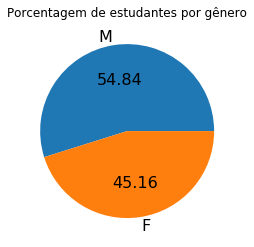

In [26]:
#Análise de perfil de estudantes
plt.figure()
g = stdinfo_df.gender.value_counts()/len(stdinfo_df)
g.plot.pie(autopct='%.2f', fontsize=16)
plt.title('Porcentagem de estudantes por gênero')
plt.ylabel('')
plt.show()

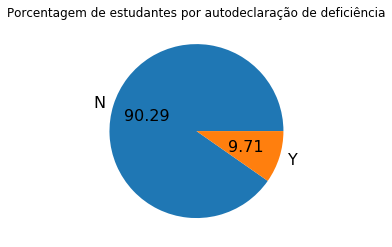

In [27]:
plt.figure()
g = stdinfo_df.disability.value_counts()/len(stdinfo_df)
g.plot.pie(autopct='%.2f', fontsize=16)
plt.title('Porcentagem de estudantes por autodeclaração de deficiência')
plt.ylabel('')
plt.show()

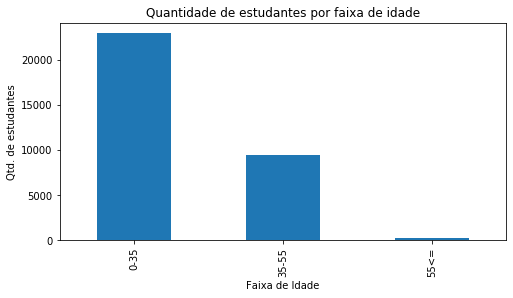

In [54]:
plt.figure()
stdinfo_df['age_band'].value_counts().plot.bar(figsize=(8,4))
plt.title('Quantidade de estudantes por faixa de idade')
plt.xlabel('Faixa de Idade')
plt.ylabel('Qtd. de estudantes')
plt.show()

In [61]:
plt.figure()
stdinfo_df['studied_credits'].size().unstack().plot(kind='bar', figsize=(15,6))
plt.title('Quantidade de estudantes por faixa de idade')
plt.xlabel('Faixa de Idade')
plt.ylabel('Qtd. de estudantes')
plt.show()

TypeError: 'int' object is not callable

<Figure size 432x288 with 0 Axes>

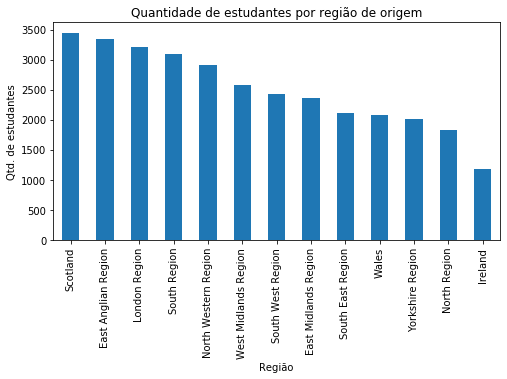

region
East Anglian Region     3340
East Midlands Region    2365
Ireland                 1184
London Region           3216
North Region            1823
North Western Region    2906
Scotland                3446
South East Region       2111
South Region            3092
South West Region       2436
Wales                   2086
West Midlands Region    2582
Yorkshire Region        2006
Name: id_student, dtype: int64


In [28]:
plt.figure()
stdinfo_df['region'].value_counts().plot.bar(figsize=(8,4))
plt.title('Quantidade de estudantes por região de origem')
plt.xlabel('Região')
plt.ylabel('Qtd. de estudantes')
plt.show()
print(stdinfo_df.groupby('region')['id_student'].count())

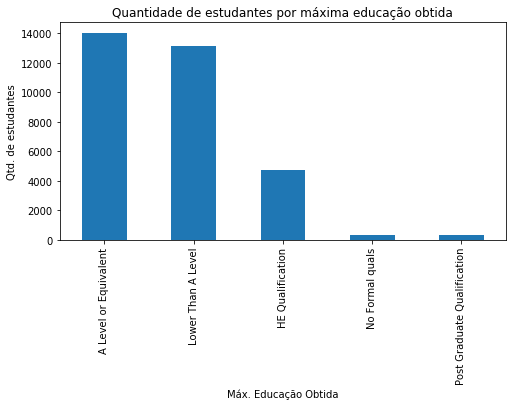

highest_education
A Level or Equivalent          14045
HE Qualification                4730
Lower Than A Level             13158
No Formal quals                  347
Post Graduate Qualification      313
Name: id_student, dtype: int64


In [46]:
plt.figure()
stdinfo_df['highest_education'].value_counts().plot.bar(figsize=(8,4))
plt.title('Quantidade de estudantes por máxima educação obtida')
plt.xlabel('Máx. Educação Obtida')
plt.ylabel('Qtd. de estudantes')
plt.show()
print(stdinfo_df.groupby('highest_education')['id_student'].count())

<Figure size 432x288 with 0 Axes>

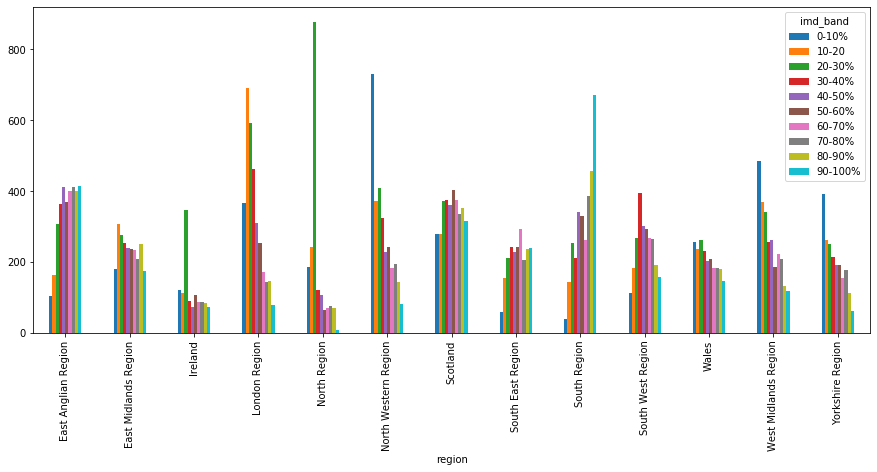

In [29]:
plt.figure()
stdinfo_df.groupby(['region', 'imd_band']).size().unstack().plot(kind='bar', figsize=(15,6))

In [ ]:
plt.figure()
stdinfo

Text(0.5, 1.0, 'Distribuição de estudantes por resultado final obtido')

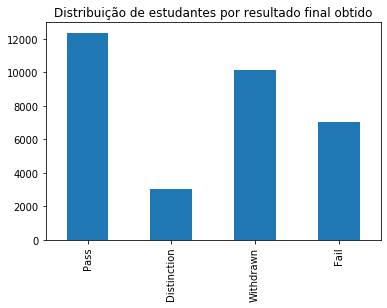

In [45]:
plt.figure()
stdinfo_df['final_result'].value_counts(sort=False).plot.bar(x={'final_result' : ['Distinction', 'Pass', 'Fail', 'Withdrawn']})
plt.title('Distribuição de estudantes por resultado final obtido')

Text(0.5, 1.0, 'Distribuição de estudantes por resultado IMD Band')

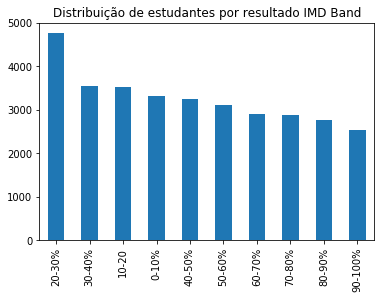

In [44]:
plt.figure()
order = np.asarray({'imd_band' : ['0-10%', '10-20', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']})
stdinfo_df['imd_band'].value_counts().plot.bar()
plt.title('Distribuição de estudantes por resultado IMD Band')

Text(0.5, 1.0, 'Distribuição de estudantes por Resultado final e gêneros')

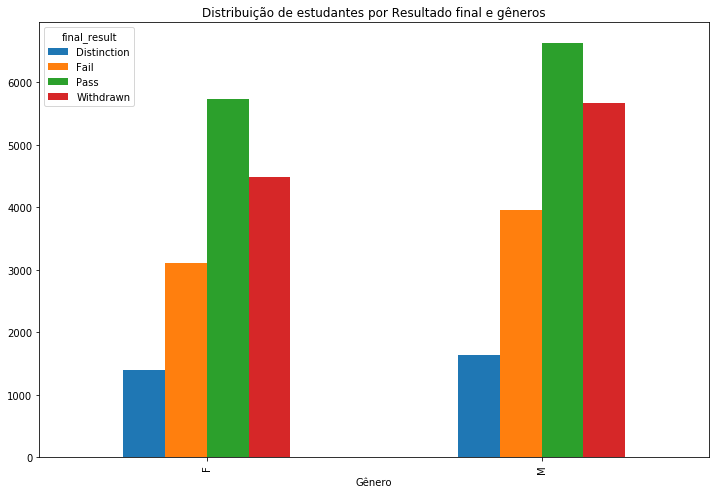

In [32]:
stdinfo_df.groupby(['gender','final_result']).size().unstack().plot(kind='bar', figsize=(12,8))
plt.xlabel('Gênero')
plt.title('Distribuição de estudantes por Resultado final e gêneros')

<Figure size 432x288 with 0 Axes>

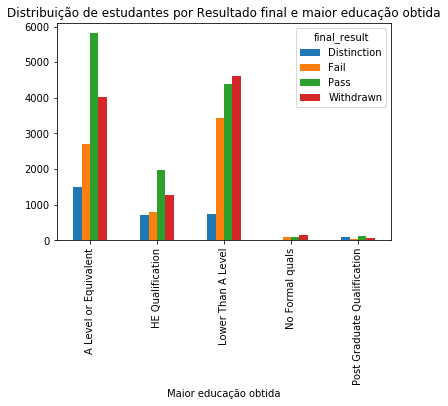

In [50]:
plt.figure()
stdinfo_df.groupby(['highest_education','final_result']).size().unstack().plot(kind='bar')
plt.xlabel('Maior educação obtida')
plt.title('Distribuição de estudantes por Resultado final e maior educação obtida')
plt.show()

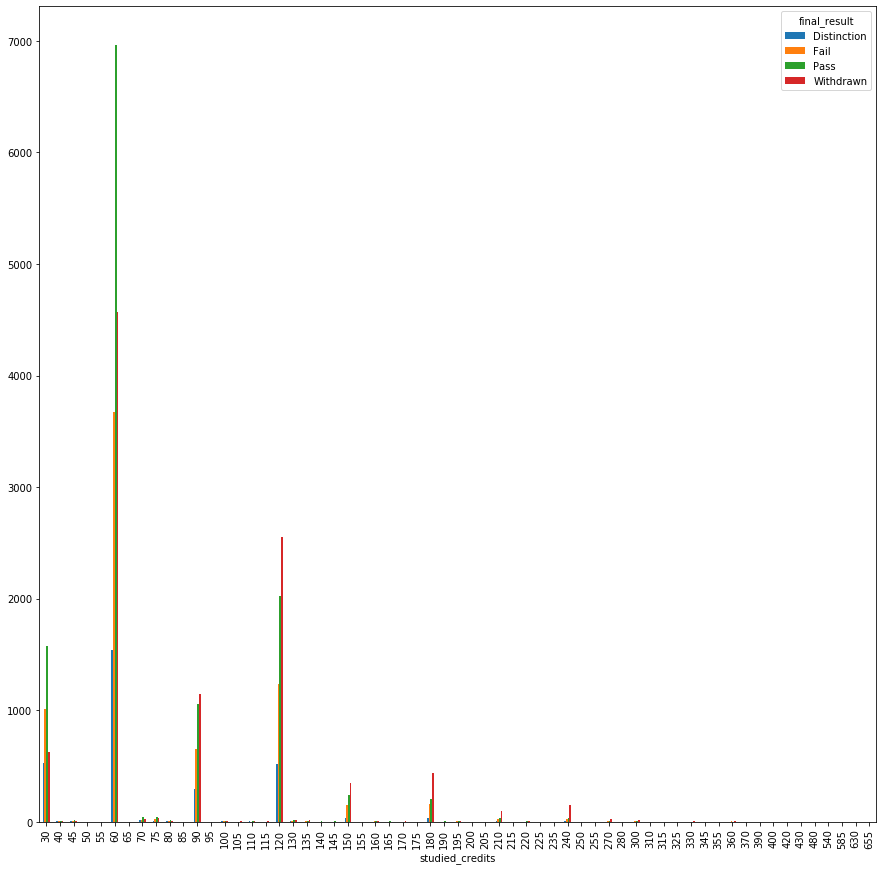

In [34]:
stdinfo_df.groupby(['studied_credits','final_result']).size().unstack().plot(kind='bar', figsize=(15,15))

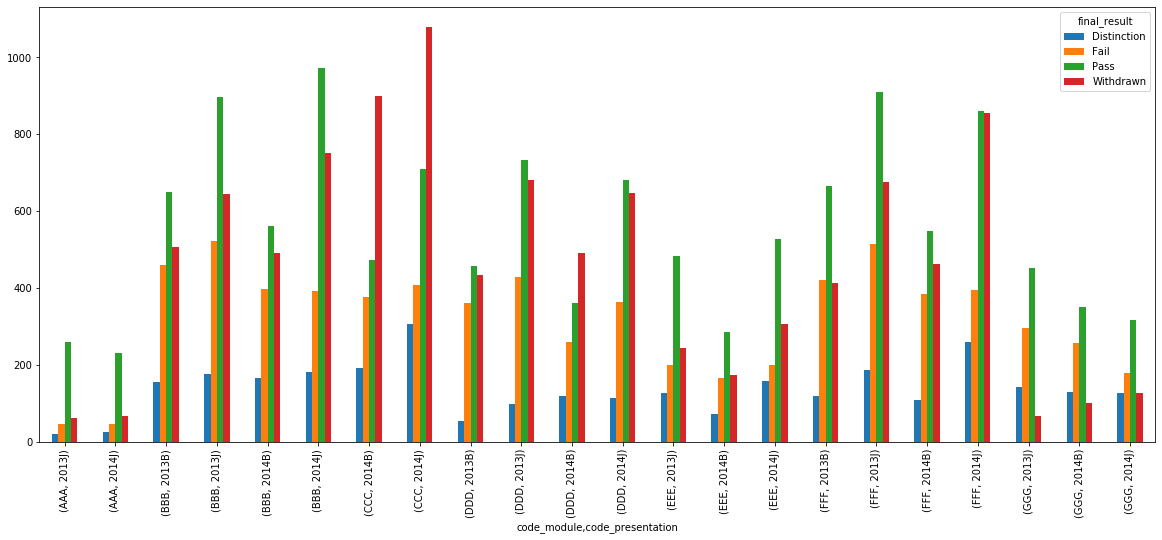

In [35]:
stdinfo_df.groupby(['code_module', 'code_presentation', 'final_result']).size().unstack().plot(kind='bar', figsize=(20,8))

Text(0.5, 1.0, 'Distribuição de estudantes por Resultado final e faixa idade')

<Figure size 432x288 with 0 Axes>

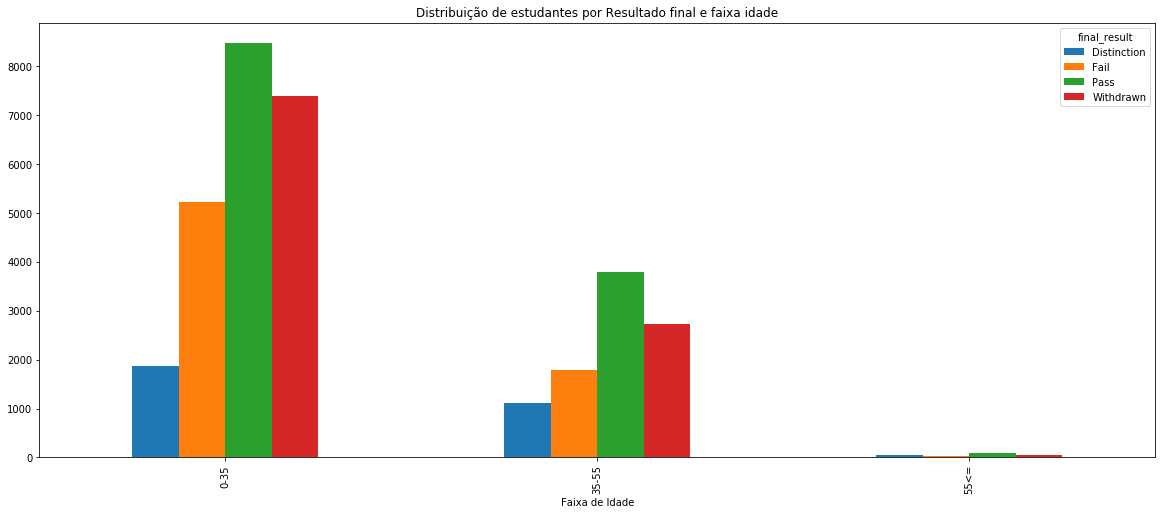

In [53]:
plt.figure()
stdinfo_df.groupby(['age_band', 'final_result']).size().unstack().plot(kind='bar', figsize=(20,8))
plt.xlabel('Faixa de Idade')
plt.title('Distribuição de estudantes por Resultado final e faixa idade')

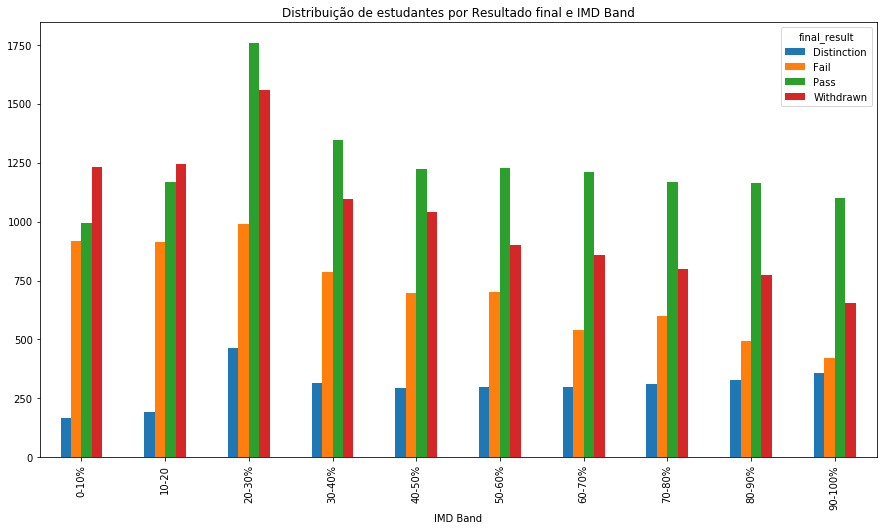

In [62]:
stdinfo_df.groupby(['imd_band','final_result']).size().unstack().plot(kind='bar',figsize=(15,8))
plt.xlabel('IMD Band')
plt.title('Distribuição de estudantes por Resultado final e IMD Band')
plt.show()

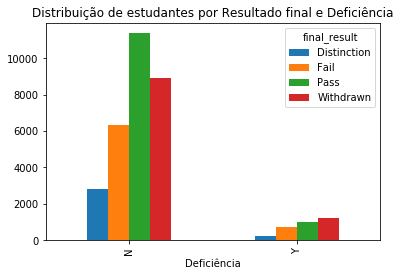

In [64]:
stdinfo_df.groupby(['disability','final_result']).size().unstack().plot(kind='bar')
plt.xlabel('Deficiência')
plt.title('Distribuição de estudantes por Resultado final e Deficiência')
plt.show()